 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
#creating the filepath to read the file
whale_returns_path = Path("Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_returns_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [5]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns_df.dropna(inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df.dropna(inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_path = Path("Resources/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Sorting the data in ascending order
sp_tsx_history_df.sort_index()
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
sp_tsx_history_df.isnull().sum()

Close    0
dtype: int64

In [12]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types by removing $ and comma from the values and then changing the data type to float
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace('[$,]','')
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype('float')

In [14]:
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [15]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history_df.pct_change()
sp_tsx_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [16]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace = True)

In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns.rename(columns = {"Close": "S&P TSX 60"}, inplace = True)
sp_tsx_daily_returns

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_daily_returns], join = "inner", axis = "columns")
combined_daily_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

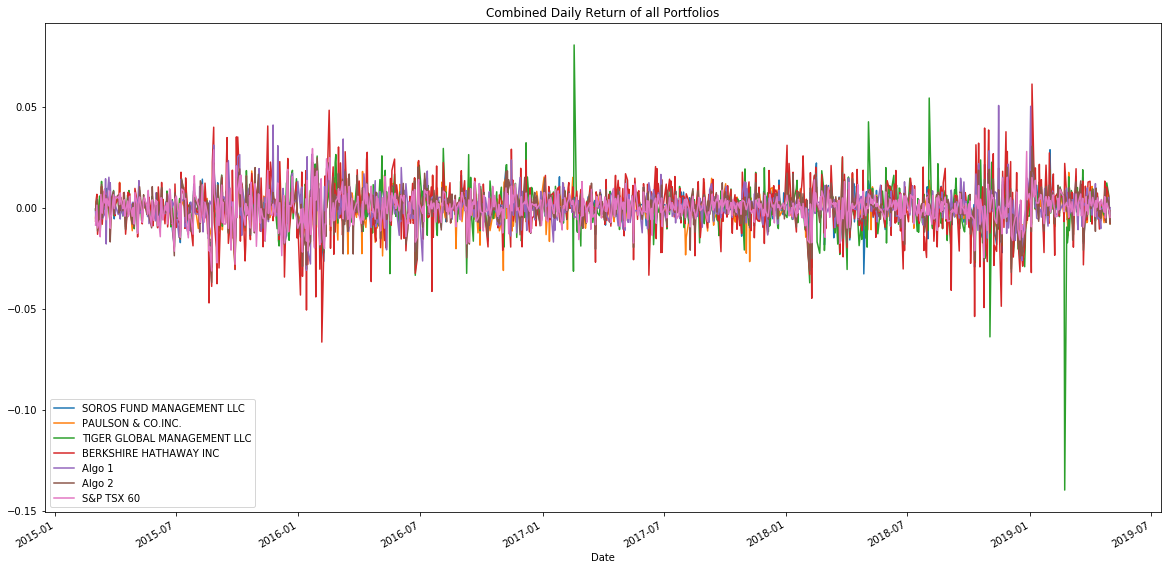

In [19]:
# Plot daily returns of all portfolios
combined_daily_returns.plot(figsize=(20,10), title ="Combined Daily Return of all Portfolios")

#### Calculate and Plot cumulative returns.

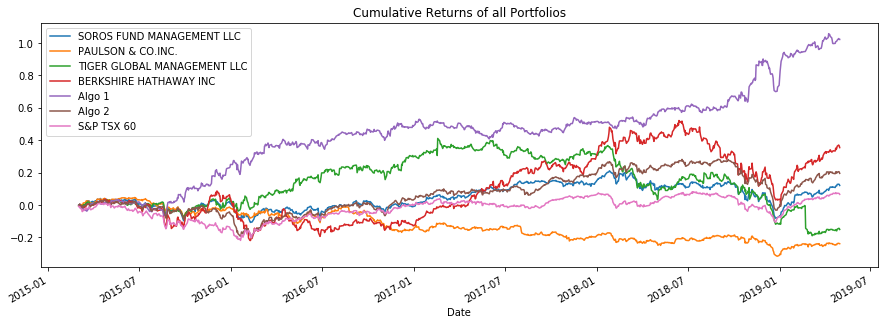

In [20]:
# Calculate cumulative returns of all portfolios using cumprod function
cumulative_returns = (1 + combined_daily_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,5), title="Cumulative Returns of all Portfolios")

In [55]:
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832
...,...,...,...,...,...,...,...
2019-04-25,0.118163,-0.245179,-0.159728,0.348932,1.011144,0.196390,0.070504
2019-04-26,0.127275,-0.238264,-0.149346,0.363007,1.017139,0.202677,0.072916
2019-04-29,0.128689,-0.236192,-0.144029,0.370126,1.027645,0.206080,0.072071


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


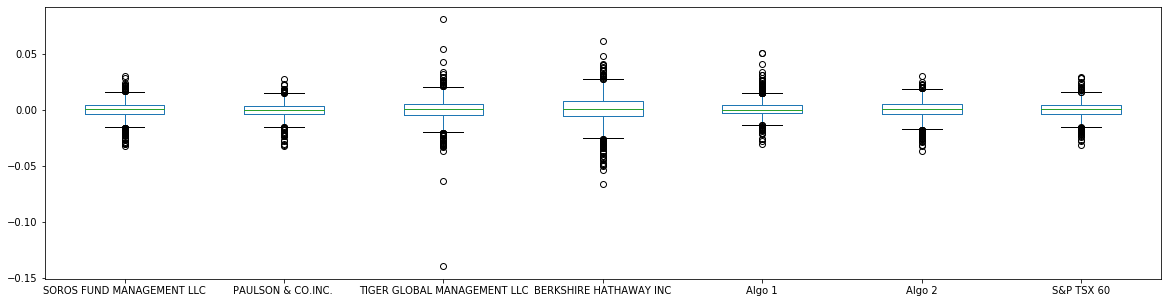

In [21]:
# Box plot to visually show risk
combined_daily_returns.plot.box(figsize=(20,5))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = combined_daily_returns.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [23]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = combined_daily_returns["S&P TSX 60"].std()
# Determine which portfolios are riskier than the S&P TSX 60
combined_daily_std = combined_daily_std.sort_values(ascending=False)

#Portfolios with standard deviation value greater than that of S&P TSX 60 will be riskier( than S&P TSX 60)
combined_daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

**Hence, BERKSHIRE HATHAWAY INC, TIGER GLOBAL MANAGEMENT LLC, Algo 2, SOROS FUND MANAGEMENT LLC, Algo 1 are riskier profiles than S&P TSX 60_**

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_daily_std * np.sqrt(252)
annualized_std.head(10)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

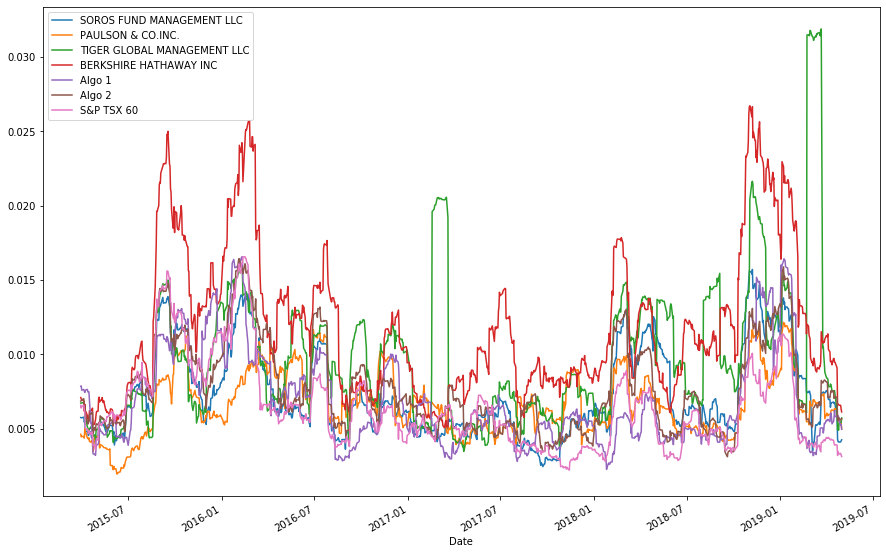

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(15,10))


### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


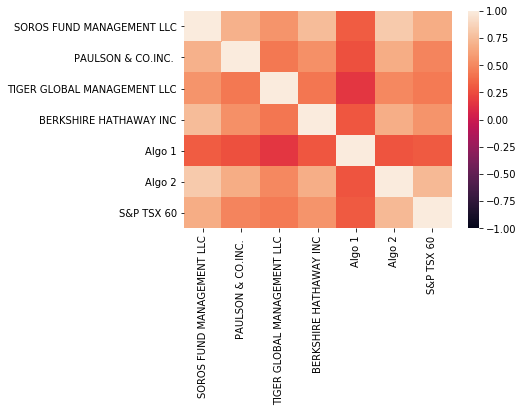

In [26]:
# Calculate the correlation
corr_df = combined_daily_returns.corr()
# Display de correlation matrix
sns.heatmap(corr_df, vmin = -1, vmax = 1)
corr_df

**From the above correlation matrix we can see that _Algo2_ may mimick the S&P TSX 60 due to their comparatively strong correlation values**

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

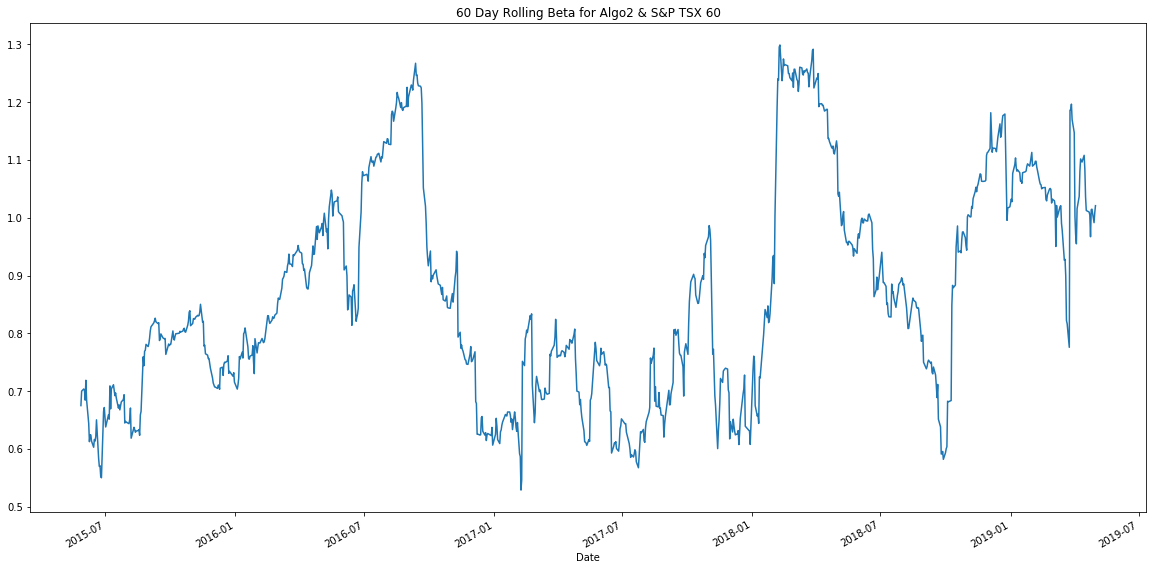

In [27]:
# Calculate covariance of a single portfolio
rolling_algo2_cov = combined_daily_returns["Algo 2"].rolling(window=60).cov(combined_daily_returns["S&P TSX 60"])
# Calculate variance of S&P TSX
rolling_sp_tsx_var = combined_daily_returns["S&P TSX 60"].rolling(window=60).var()
# Computing beta
beta = rolling_algo2_cov / rolling_sp_tsx_var
# Plot beta trend
beta.plot(figsize = (20,10), title ="60 Day Rolling Beta for Algo2 & S&P TSX 60")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [28]:
# Use `ewm` to calculate the rolling window
exp_weighted_avg = combined_daily_returns.ewm(halflife = 21).std()
exp_weighted_avg.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
annualized_sharpe_ratio = (combined_daily_returns.mean()*252) / annualized_std
annualized_sharpe_ratio

Algo 1                         1.491514
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
PAULSON & CO.INC.             -0.547594
S&P TSX 60                     0.195550
SOROS FUND MANAGEMENT LLC      0.286709
TIGER GLOBAL MANAGEMENT LLC   -0.144455
dtype: float64

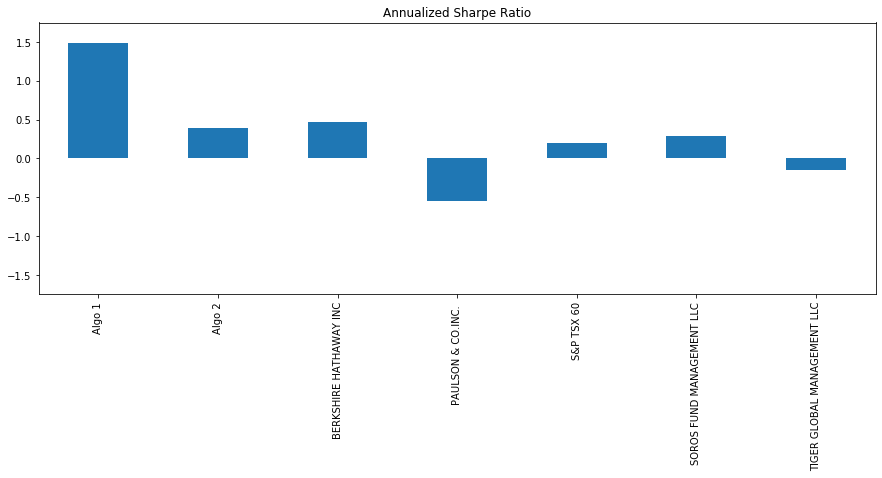

In [30]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot(kind = 'bar', figsize = (15,5), title = "Annualized Sharpe Ratio", ylim = (-1.75,1.75))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
apple_historical_path = Path("Resources/apple_historical.csv")
apple_historical_returns = pd.read_csv(apple_historical_path)
apple_historical_returns['Date'] = pd.to_datetime(apple_historical_returns['Date']).dt.date
apple_historical_returns.set_index("Date", inplace = True)

#sortind data in ascending order 
apple_historical_returns.sort_index()
apple_historical_returns.head()

,Close
Date,
2014-01-02,19.75
2014-01-03,19.32
2014-01-06,19.43
2014-01-07,19.29
2014-01-08,19.41


In [32]:
# Reading data from 2nd stock
otex_historical_path = Path("Resources/otex_historical.csv")
otex_historical_returns = pd.read_csv(otex_historical_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_historical_returns.sort_index()
otex_historical_returns.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [33]:
# Reading data from 3rd stock
shop_historical_path = Path("Resources/shop_historical.csv")
shop_historical_returns = pd.read_csv(shop_historical_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_historical_returns.sort_index()
shop_historical_returns.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [34]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([apple_historical_returns, otex_historical_returns, shop_historical_returns], join = "inner", axis = "columns")
combined_df.head()

,Close,Symbol,Close,Symbol,Close
Date,,,,,
2018-01-02,43.07,OTEX,43.58,SHOP,132.06
2018-01-03,43.06,OTEX,43.07,SHOP,135.15
2018-01-04,43.26,OTEX,42.91,SHOP,137.46
2018-01-05,43.75,OTEX,42.57,SHOP,137.26
2018-01-08,43.59,OTEX,42.16,SHOP,139.51


In [35]:
# Reset Date as index
#This step is performed while reading the data into DataFrame

,Close,Symbol,Close,Symbol,Close
Date,,,,,
2018-01-02,43.07,OTEX,43.58,SHOP,132.06
2018-01-03,43.06,OTEX,43.07,SHOP,135.15
2018-01-04,43.26,OTEX,42.91,SHOP,137.46
2018-01-05,43.75,OTEX,42.57,SHOP,137.26
2018-01-08,43.59,OTEX,42.16,SHOP,139.51
...,...,...,...,...,...
2019-04-24,51.79,OTEX,51.41,SHOP,296.33
2019-04-25,51.32,OTEX,51.73,SHOP,295.37
2019-04-26,51.08,OTEX,51.77,SHOP,299.10


In [36]:
# Reorganize portfolio data by having a column per symbol
combined_df.drop(['Symbol'], axis = 1, inplace = True)
combined_df.columns = ['APPL', 'OTEX', 'SHOP']
combined_df.head()

,APPL,OTEX,SHOP
Date,,,
2018-01-02,43.07,43.58,132.06
2018-01-03,43.06,43.07,135.15
2018-01-04,43.26,42.91,137.46
2018-01-05,43.75,42.57,137.26
2018-01-08,43.59,42.16,139.51


In [37]:
# Calculate daily returns
daily_returns = combined_df.pct_change()

# Drop NAs
daily_returns.isnull().sum()
daily_returns.dropna(inplace = True)

# Display sample data
daily_returns.sample()

,APPL,OTEX,SHOP
Date,,,
2018-01-25,-0.017906,-0.010867,0.04596


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
daily_returns["Custom Portfolio Daily Returns"] = daily_returns.dot(weights)

# Display sample data
daily_returns.head()

,APPL,OTEX,SHOP,Custom Portfolio Daily Returns
Date,,,,
2018-01-03,-0.000232,-0.011703,0.023398,0.003821
2018-01-04,0.004645,-0.003715,0.017092,0.006007
2018-01-05,0.011327,-0.007924,-0.001455,0.000649
2018-01-08,-0.003657,-0.009631,0.016392,0.001035
2018-01-09,-0.000229,-0.000712,-0.011254,-0.004065


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
combined_daily_returns = pd.concat([combined_daily_returns, daily_returns["Custom Portfolio Daily Returns"]], join = 'inner', axis = 'columns')

In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_daily_returns.isnull().sum()   #no null vlaues exists

SOROS FUND MANAGEMENT LLC         0
PAULSON & CO.INC.                 0
TIGER GLOBAL MANAGEMENT LLC       0
BERKSHIRE HATHAWAY INC            0
Algo 1                            0
Algo 2                            0
S&P TSX 60                        0
Custom Portfolio Daily Returns    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
all_portfolio_std = combined_daily_returns.std() * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

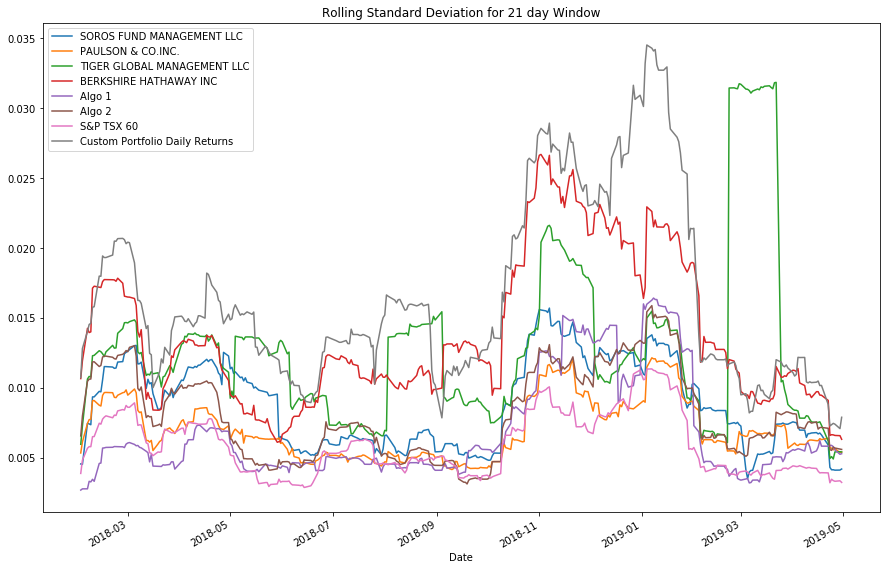

In [43]:
# Calculate rolling standard deviation
rolling_std_21 = combined_daily_returns.rolling(21).std()
# Plot rolling standard deviation
rolling_std_21.plot(figsize=(15,10), title = 'Rolling Standard Deviation for 21 day Window')

### Calculate and plot the correlation

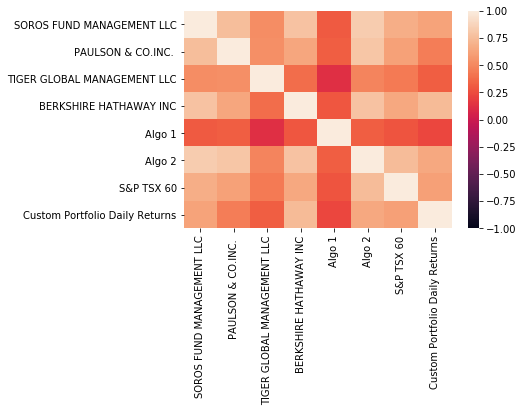

In [44]:
# Calculate and plot the correlation
corr_df = combined_daily_returns.corr()
sns.heatmap(corr_df, vmin = -1, vmax = 1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

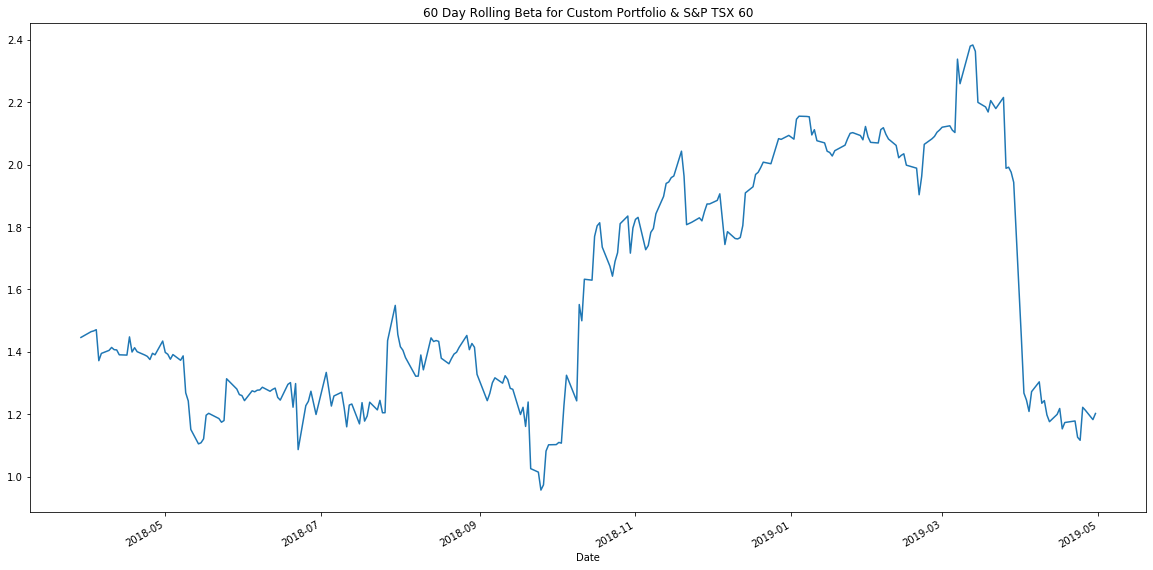

In [45]:
# Calculate and plot Beta

# Calculate rolling covariance of a custom portfolio compared to S&P 60 TSX
rolling_algo2_cov = combined_daily_returns["Custom Portfolio Daily Returns"].rolling(window=60).cov(combined_daily_returns["S&P TSX 60"])
# Calculate rolling variance of S&P TSX
rolling_sp_tsx_var = combined_daily_returns["S&P TSX 60"].rolling(window=60).var()
# Computing rolling beta
beta = rolling_algo2_cov / rolling_sp_tsx_var
# Plot beta trend
beta.plot(figsize = (20,10), title ="60 Day Rolling Beta for Custom Portfolio & S&P TSX 60")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (combined_daily_returns.mean()*252) / all_portfolio_std
sharpe_ratios.sort_values(ascending=False)

Algo 1                            1.903790
Custom Portfolio Daily Returns    1.395425
BERKSHIRE HATHAWAY INC            0.222812
S&P TSX 60                        0.071275
Algo 2                            0.062623
SOROS FUND MANAGEMENT LLC        -0.057481
PAULSON & CO.INC.                -0.387875
TIGER GLOBAL MANAGEMENT LLC      -1.366447
dtype: float64

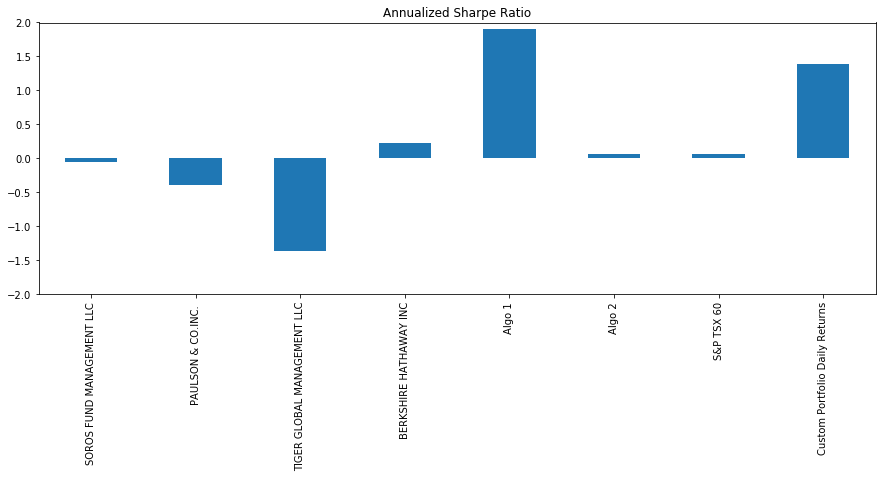

In [56]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', figsize = (15,5), title = "Annualized Sharpe Ratio", ylim = (-2,2))

### How does your portfolio do?

Write your answer here!

As per our analysis __Custom portfolio__ performed better than other portfolios, scoring a sharpe ratio of **1.395425** but it still could not outperform algorithmic portfolio __"Algo 1"__, which scored a sharpe ratio of **1.903790**. Hence, in terms of volatility __"Algo 1"__ & __Custom portfolio__ outperformed all the other portfolios including __S&P TSX 60__.